# 3.2.2 - Advanced - Instrumental Variables 2

COMET Team <br> *Names*  
2024-06-03

## Prerequisites

-   A basic understanding of instrumental variables
-   A basic understanding of Jupyter and R
-   A theoretical understanding of linear regressions

## Learning Outcomes

After completing this notebook, you will be able to:

-   Understand how instrumental variables solve issues with omitted
    variable bias and endogeneity
-   Choose appropriate instrumental variables
-   Apply two-stage least-squares regressions (2SLS) in the context of
    undergraduate research using R

## References

-   CORE (Curriculum Open-access Resources in Economics) Econ. (n.d.).
    THE ECONOMY (1.14.1) \[E-book\]. Electric Book Works.
-   Hanck, C., Arnold, M., Gerber, A., & Schmelzer, M. (n.d.).
    Introduction to econometrics with R \[E-book\]. University of
    Duisburg-Essen.
-   Kleiber, Christian, and Achim Zeileis. 2008. Applied Econometrics
    with R. New York: Springer-Verlag.
-   Kiviet, J. F., & Kripfganz, S. (2021). Instrument approval by the
    Sargan test and its consequences for coefficient estimation.
    Economics Letters, 205, 109935.
-   Stock, James, H., and Francesco Trebbi. 2003. “Retrospectives: Who
    Invented Instrumental Variable Regression?” Journal of Economic
    Perspectives, 17 (3): 177-194.
-   Wright, P. (1928). The Tariff on Animal and Vegetable Oils. The
    Macmillan Company.

## Recap

In *Instrumental Variables 1*, we introduced instrumental variables and
explained how instrumental variables can be used to solve issues with
partial random assignment and OVB. We also showed how to adjust our
specification for when the instrument is not randomly assigned. In this
notebook, we assume knowledge of the material presented in *Instrumental
Variables 1* and turn to the issue of endogeneity.

In [ ]:
# load packages needed for the analysis
library(tidyverse)
library(AER)
library(haven)

# load self-writing tests
source('advanced_instrumental_variables2_test.r')

## Example 3 - Tariffs on Animal and Vegetable Oils

Economists attribute the first formal application of instrumental
variable analysis to Philip G. Wright, in his 1928 review *Tariffs on
Animal and Vegetable Oils* (Stock et al. 2003). In Appendix B, Wright
discusses the economic effects of imposing tariffs in the imports of
butter and flaxseed, which are both major inputs of animal and vegetable
oils. Wright explains that to determine the effects of tariffs on the
quantity of output and market price of the goods, we must find the
elasticities of demand and supply of butter and flaxseed. The problem
with estimating elasticities, argues Wright, is that we cannot estimate
demand and supply curves from price-output data alone: the combinations
of points are determined endogenously by both demand and supply
conditions.

We explain it below.

### The problem

Wright had to estimate demand and supply curves with data on prices and
quantity of output. He explains that “if cost \[supply\] conditions
remain fixed while demand conditions vary, prices will lie on the supply
curves; if demand conditions remain fixed while cost \[supply\]
conditions vary, prices will lie on the demand curve.”

In panel A of figure 3, the supply curve is kept fixed, so the
combination of points $(P_{i}, Q_{i})$ must necessarily be caused by
demand shifts. We can estimate the supply curve by connecting the points
$(P_{i}, Q_{i})$. Panel B is analogous, albeit when demand is fixed and
shifts in supply explain the combinations $(P_{i}, Q_{i})$. We can
estimate the demand curve by connecting the points $(P_{i}, Q_{i})$.

<figure>
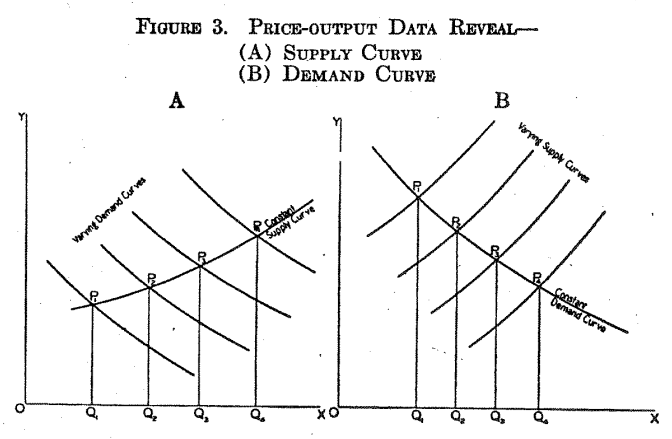
<figcaption aria-hidden="true">Appendix B, The Tariff on Animal and
Vegetable Oils. Wright, P. (1928). The Macmillan Company.</figcaption>
</figure>

We face a problem when neither the supply nor the demand curve remains
fixed. When that happens “price-output data yield no direct information
as to either curve.” That is, there is an infinite combination of
simultaneous demand and supply shifts that could lead to the combination
of points $(P_{i}, Q_{i})$.

In figure 4, Wright shows that if you connect the $(P_{i}, Q_{i})$ when
both demand and supply shift, the curve recovered is neither the
underlying demand nor the underlying supply curve.

<figure>
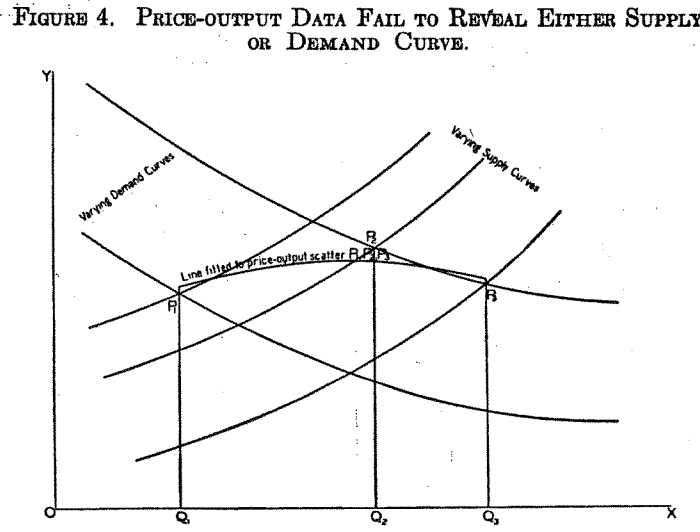
<figcaption aria-hidden="true">Appendix B, The Tariff on Animal and
Vegetable Oils. Wright, P. (1928). The Macmillan Company.</figcaption>
</figure>

Based on this information, Wright concludes that “the elasticities of
supply and demand cannot be computed from price, output, and consumption
data alone (…) elasticities of supply and demand can be computed only
when assurance is obtained that \[either\] the cost \[supply\] or demand
curve remains fixed.” Since in most situations we cannot know if either
demand or supply is fixed, we have a problem of endogeneity.

### The solution

Wright also provides a solution to the problem above: “in the absence of
intimate knowledge of demand and supply conditions, statistical methods
(…) must be based on the introduction of additional factors. Such
additional factors may be factors which (A) affect demand conditions
without affecting cost \[supply\] conditions or which (B) affect cost
\[supply\] conditions without affecting demand conditions.” Based on
these definitions and for the case of agricultural crops, answer the
questions below.

Which of the following could be an example of “additional factor type A”
as described by Wright?

1.  Amount of rainfall per harvest
2.  Price of a substitute for the crop
3.  GDP per capita

In [ ]:
# Enter your answer below as "A", "B", or "C"

answer_1 <- "..."
test_1()

Which of the following could be an example of “additional factor type B”
as described by Wright?

1.  Yield per acre of the harvest
2.  Income taxes
3.  Marginal product of labor

In [ ]:
# Enter your answer below as "A", "B", or "C"

answer_2 <- "..."
test_2()

It should be clear that Wright’s “additional factors” were nothing more
than instrumental variables. Let’s model Wright’s problem using the
example of the demand of flaxseed.

### Modeling the demand elasticity of flaxseed

We can estimate the relationship between the quantity and price of
flaxseed with a model of the form:

$$
\log(P_i) = \beta_0 + \beta_1 \log(Q_i) + u_i 
$$

where

-   $P_i$ is the market price per kilogram of flaxseed for harvest $i$
-   $Q_i$ is the number of kilograms of flaxseed sold for harvest $i$

Our goal is to find an unbiased estimate of $\beta_1$, which can be
interpreted as the reciprocal of the elasticity of demand: the % change
in price associated with 1% change in quantity. We cannot estimate
$\beta_1$ with OLS because the model is endogenous; $(P_{i}, Q_{i})$ are
determined by both demand and supply jointly.

To solve this problem we need an instrument for quantity of flaxseed.
The instrument must satisfy:

1.  Relevance: must have a causal effect on quantity of flaxseed
2.  Exogenous: must only affects the price of flaxseed through the
    quantity of flaxseed
3.  Random assignment: must not be correlated to the error term

A potential candidate for an instrument could be the amount of rainfall
per harvest. It has a causal effect on quantity (more rain makes for a
better harvest), does not affect price directly, and is a random event.

Now it’s your turn to model a solution to endogeneity in the context of
cigarette consumption taxes.

## Example 4: Pigouvian Taxes on Cigarettes

Pigouvian taxes are taxes on goods and services that generate negative
externalities. Microeconomic theory says that to maximize social surplus
in competitive markets, we should tax goods with negative externalities
until their prices equal the marginal social cost of production.

Consumption of cigarettes have well known negative externalities;
smoking cigarettes increases the risk of health problems, adding costs
to public healthcare systems. Policy makers across the globe have
attempted to eliminate these negative externalities by imposing
Pigouvian taxes on cigarette purchases. To determine the optimal tax
rate, economists need to estimate demand and supply curves, as well as
the associated price elasticities for cigarettes.

In this example, you will try to estimate the price elasticity of demand
for cigarettes with the dataset `CigarettesSW` from the package `AER`.
`CigarettesSW` is a panel dataset that contains information about
cigarette consumption as well as other economic indicators for all 48
continental federal states in the US from 1985 to 1995. For our
analysis, we’ll only use data from the 1995 cross-section.

Run the cells below to load, filter, and see an overview of the dataset.

In [ ]:
# load the dataset
data("CigarettesSW")

# run the command below to see a detailed description of the variables
#?CigarettesSW 

In [ ]:
# filter dataset for the year 1995
c1995 <- subset(CigarettesSW, year == "1995")
head(c1995)

### Choosing our estimator

We’re interested in estimating the price elasticity of demand for
cigarettes. For a single variable demand function, the price elasticity
of demand is the coefficient $\beta_1$ in the equation below.

$$
\log(Q_i) = \beta_0 + \beta_1 \log(P_i) + u_i 
$$

where

-   $Q_i$ is the number of cigarette packs per capita sold for state $i$
-   $P_i$ is the after-tax average real price per pack of cigarettes for
    state $i$

Why can’t we estimate $\beta_1$ with a simple regression of $\log(Q_i)$
on $\log(P_i)$?

1.  We are faced with endogeneity
2.  There is reverse causality
3.  $\log(P_{i})$ is correlated to the error term
4.  All of the above

In [ ]:
# Enter your answer below as "A", "B", "C", or "D"

answer_3 <- "..."
test_3()

Having ruled out the possibility of an OLS estimator, we turn to IV
estimators. List the conditions that our variable needs to meet to be an
appropriate instrument:

1.  Must not be correlated to the error term
2.  Must have a causal effect on the price of cigarettes
3.  Must have a causal effect on the demand of cigarettes
4.  Must only affect the price of cigarettes through the demand of
    cigarettes
5.  Must only affect the demand of cigarettes through the price of
    cigarettes

In [ ]:
# Enter your answer as a string of letters in alphabetical order ex: "ABD", "BCE", or "CDE"

answer_4 <- "..."
test_4()

A variable that appears to meet the criteria above is the general
state-level sales taxes. Sales taxes increase the prices of cigarettes
in the market and should not have a direct effect on quantity demanded.
Although sales taxes are *definitely not randomly assigned*, we’ll
assume for now that they are uncorrelated with the error term in our
model.

We can calculate general state-level sales taxes by subtracting `tax`
from `taxs` on our dataset. We’re going to call the new variable
`sales_tax`, coded in dollars per pack.

Below we compute the real sales tax and real per capita prices.

In [ ]:
# compute the real sales tax
c1995$sales_tax <- ((c1995$taxs - c1995$tax) / c1995$cpi)

# compute real per capita prices
c1995$rprice <- (c1995$price / c1995$cpi)

head(c1995)

### Validating instrument relevance

Before we run our IV regression with `ivreg()`, let’s validate our
choice of the instrument. We think sales taxes increase the price of
cigarettes. Let’s calculate the correlation between both variables to
check that our data matches our economic logic.

> **Think deeper**: what if we found a negative correlation between the
> instrument and the treatment? How would that affect our choice of the
> instrumental variable?

In [ ]:
# check the correlation between sales tax and price
cor(c1995$sales_tax, c1995$rprice)

A correlation of approximately 0.686 indicates that `sales_tax` and
`rprice` are indeed positively related: higher sales taxes lead to
higher prices.

We can further test the relevance assumption by looking at the
relationship between the instrument and the treatment on the first stage
regression. If we let `sales_tax` equal $Z$, what would be the
specification of our first stage regression?

1.  $\log(Q_i)= π_0 + π_1Z_i + ν_i$
2.  $\log(P_i)= π_0 + π_1Z_i + ν_i$
3.  $\log(Q_i)= π_0 + π_1\widehat{\log(P_i)} + π_2Z_i + ν_i$
4.  $\log(P_i)= π_0 + π_1\widehat{\log(Q_i)} + π_2Z_i + ν_i$

In [ ]:
# Enter your answer below as "A", "B", "C", or "D"

answer_5 <- "..."
test_5()

Let’s run the first stage regression using the function `lm()`.

In [ ]:
# run the first stage
cig_s1 <- lm(log(rprice) ~ sales_tax, data = c1995)

# test the significance of the coefficients with robus standard errors
coeftest(cig_s1, vcov = vcovHC)

We find that an increase of 1 dollar per pack in sales taxes leads to an
increase of approximately 3 percent in the real sales price. The effect
is significant at the 0.1% significance level.

It is very important that the coefficient on our first stage is
statistically significant. If it’s not, we do not have enough evidence
to reject the null hypothesis that the instrument is not related to the
variable of interest, and the instrument fails to satisfy the necessary
assumption of instrument relevance.

> **Rule of thumb**: it is recommended that the t-statistic of the first
> stage should have absolute value larger than 3.2 to satisfy instrument
> relevance (Stock and Yogo, 2005).

How much of the variation in the variable of interest does our
instrument actually predict?

We can find this by calculating the $R^2$ of our regression, the
goodness-of-fit measure for linear regression models. It indicates the
percentage of the variance in the dependent variable `rprice` explained
by the independent variable `sales_tax`.

In [ ]:
# R^2 of the first stage regression
summary(cig_s1)$r.squared

The $R^2$ of our regression reveals that 47.1% of the variation in
after-tax prices is explained by the variation of sales taxes across
states. This suggests that our instrument has significant predictive
power, which can make us more confident of our results.

Unfortunately, there is no quantitative way to validate the IV
assumption of exogeneity. Instead, we must rely on our economic logic:
we think it is reasonable to assume that general state-level taxes are
not correlated to the error term in our model.

### Estimating the elasticity of demand with 2SLS

Now, we’re ready to run our IV regression with `ivreg()`.

In [ ]:
# run the IV regression with 'ivreg()'
cig_ivreg <- ivreg(log(packs) ~ log(rprice) | sales_tax, data = c1995)

# test the significance of the coefficients with robus standard errors
coeftest(cig_ivreg, vcov = vcovHC)

The regression output shows that an increase of 1% in price is
associated with a decrease of 1.08% in quantity demanded, indicating
that the demand for cigarettes is quite sensitive to changes in price.

But we’re not done yet. As always, we need to take a closer look at our
model, understand the shortcomings of our modeling choices, and try to
fix them.

### Demand for cigarettes with multiple regressors

In the previous example, we chose sales price as the only regressor of
our demand function. However, we know that there are several other
socioeconomic variables that affect the demand for goods and services.
We have data on average income for each state. As income likely affects
both the demand for cigarettes and our instrument[1], we should consider
adding it as a control. Let’s fit the model again but this time with
real per capita income $I$ as an additional regressor.

$$
\log(Q_i) = \beta_0 + \beta_1 \log(P_i) + \beta_2 \log(I_i) + u_i 
$$

Let’s calculate the real per capita income and store it as `rincome` on
our dataset `c1995`.

[1] States with high incomes per capita tend to have higher income
taxes, raising proportionally more money through income taxes than sales
taxes.

In [ ]:
# add rincome to the dataset
c1995$rincome <- with(c1995, income / population / cpi)

Let’s run `ivreg()` again but this time controlling for `rincome`.

> Remember that we have to specify the control on both sides of the
> vertical bar.

In [ ]:
# run the IV regression with 'ivreg()' controlling for income
cig_ivreg2 <- ivreg(log(packs) ~ log(rprice) + log(rincome) | log(rincome) + sales_tax, data = c1995)

# test the significance of the coefficients with robus standard errors
coeftest(cig_ivreg2, vcov = vcovHC)

The estimated effect is approximately -1.14, a stronger effect than our
single regressor estimate. Since we expect income to have a positive
effect on quantity demanded, this result makes intuitive sense. If those
were the only sources of variation affecting our model, we could be
confident about our results.

> **Think deeper**: Are there any potential sources of bias that we fail
> to control for in our model?

### Demand for cigarettes with multiple instruments

What if we have two potential candidates for instrumental variables?

For example, we could have potentially used pigouvian taxes that have
already been implemented as an instrument for cigarette prices. The
cigarette-specific taxes increase the market price of cigarettes, and,
if they are not correlated to the error term, meet the exogeneity
condition to be an instrumental variable.

IV regressions are flexible enough to allow for multiple instruments.
Let’s calculate the real pigouvian taxes, store them as `cig_tax` in our
dataset, and run `ivreg()` with both `sales_tax` and `cig_tax` as our
instruments.

In [ ]:
# add cigtax to the data set
c1995$cig_tax <- c1995$tax/c1995$cpi

# run `ivreg()` with multiple instruments
cig_ivreg3 <- ivreg(log(packs) ~ log(rprice) + log(rincome) | 
                    log(rincome) + sales_tax + cig_tax, data = c1995)

# test the significance of the coefficients with robust standard errors
coeftest(cig_ivreg3, vcov = vcovHC)

The elasticity of demand caculated with both instruments is even greater
than that estimated with the previous models. We find that the demand
for cigarettes decreases by 1.28% for every 1% increase in price.

Our standard errors decreased significantly when we added a second
instrument to our specification. That happens because we’re using more
variation to explain the treatment. Nevertheless, it is important to
remember that lower standard errors only add value to the model if the
instruments are valid: if they meet the conditions for instrumental
variables.

Let’s revisit our discussion of instrument validity with our extended
model.

### Validating instrument relevance with multiple instruments

Specifications with multiple instruments still need to meet the
relevance criteria. The relevance condition is only met if the
instruments are jointly significant, which can be determined through an
F-test of the first stage coefficients. If we reject the null hypothesis
of the F-test, it means that at least one of the coefficients is
significant.

> **Rule of thumb**: it is recommended that the F-statistic should be at
> least 10 to satisfy instrument relevance (Stock and Yogo, 2005).

Our first stage with a control and 2 instruments is:

$$
\log(P_i)= \pi_{0} + \pi_{1}Z_{1i} + \pi_{2}Z_{2i} + \pi_{3}\log(I_{i}) + ν_i
$$

where

-   $\log(P_{i})$ is our treatment `log(rprice)`
-   $Z_{1i}$, $Z_{2i}$ are our instruments `sales_tax` and `cig_tax`
-   $\log(I_{1})$ is our control `log(rincome)`

Let’s run the joint hypothesis F-test with the function `anova()`. The
inputs to `anova()` are (1) the model of interest and (2) a restricted
version of the model of interest omitting the variables being tested.

In [ ]:
# run first stage
multiple_s1 <- lm(log(rprice) ~ sales_tax + cig_tax + log(rincome), data = c1995)

# run restricted version of first stage
multiple_s1_restricted <- lm(log(rprice) ~ log(rincome), data = c1995)

# test the significance of the coefficients with `anova`
anova(multiple_s1_restricted, multiple_s1)

The F-test output shows that our F-stat is 244, sufficient to reject the
null hypothesis that our instruments are significant at the 0.1%
significance level. This suggests that our instruments do indeed meet
the relevance criteria.

Now we turn to exogeneity: the instruments need to be uncorrelated to
the error term of the original model.

In our case, that means that `sales_tax` and `cig_tax` need to be
uncorrelated to $u_{i}$ in the specification below.

$$
\log(Q_i) = \beta_0 + \beta_1 \log(P_i) + \beta_2 \log(I_i) + u_i
$$

As we’ve seen, there is no easy way to test for this condition when we
have a single instrument - we must instead rely on our economic logic
about the variables and their relationships. However, there is a clever
way of testing for exogeneity when we have more than one instrument.

### Validating instrument exogeneity with multiple instruments

If both instruments are relevant and exogenous with respect to the
model, then their estimated causal effects must be unbiased. Think about
it: if both instruments isolate good variation of the variable of
interest, these two slices of variation must represent the same
relationship between the variable of interest and the outcome.
Therefore, to test for exogeneity when we have more than one instrument,
we can calculate the 2SLS estimate using each instrument separately and
compare both estimates. If they are not the same, chances are at least
one of the instruments is not exogenous.

> Note that this test only works if we have more instruments than
> variables of interest, a condition denominated **overidentification**.

Let’s run two IV regressions: one just with `sales_tax` as an instrument
and the other just with `cig_tax` as an instrument. If the estimated
coefficients from these two regressions are not similar, we probably
have at least one invalid instrument.

In [ ]:
# run the IV regression with `sales_tax` as an instrument
sales_tax_iv <- ivreg(log(packs) ~ log(rprice) + log(rincome) | log(rincome) + sales_tax, data = c1995)

# test the significance of the coefficients with robust standard errors
coeftest(sales_tax_iv, vcov=vcovHC)

# run the IV regression with `cig_tax` as an instrument
cig_tax_iv <- ivreg(log(packs) ~ log(rprice) + log(rincome) | log(rincome) + cig_tax, data = c1995)

# test the significance of the coefficients with robust standard errors
coeftest(cig_tax_iv, vcov=vcovHC)

Our estimates appear to be quite dissimilar, which could indicate that
at least one of our instruments is not exogenous. Let’s use our economic
knowledge to interpret this result.

Perhaps pigouvian taxes differ greatly based on the strength of the
cigarette industry in each state. For example, states with cigarette
manufacturing facilities might have both a cultural inclination to smoke
more and have strong lobbying groups that keep excise taxes low. That is
something that we don’t control for in our regression, which could
possibly undermine the exogeneity of `cig_tax`, deeming it an
inappropriate instrument.

It could also be possible that the difference between both 2SLS
estimates is actually just sampling variance. If we look at the
confidence interval of the coefficients above, we see that each
confidence interval contains both of the estimated effects.

To certify ourselves that the difference between both estimates is
actually material (and not just sampling variance) we need to do a
statistical test, called the **overidentifying restriction test** with
the J-statistic. The statistical theory of this test is beyond the scope
of this notebook but in the next section we learn to analyze the test
outputs given by the software.

### Analyzing diagnostic tests of `ivreg()`

The function `ivreg()` has diagnostic tests that estimate the exogeneity
test as well as other tests related to the IV assumptions. Let’s examine
the `summary()` output of `ivreg()` for our `cig_ivreg3` specification.

> Remember that `cig_ivreg3` is the IV regression with both of the
> instruments `sales_tax` and `cig_tax`, and with the control `rincome`.

In [ ]:
# run summary of our IV regression output
summary(cig_ivreg3, diagnostics=TRUE)

The diagnostic tests conducted by `ivreg()` are (1) Weak instruments (2)
Wu-Hausman (3) Sargan test.

-   **Weak instruments test**: tests for instrument relevance with the
    F-statistic. This test is equivalent to what we did with `anova()`:
    if we reject the null, it means that at least one instrument is not
    weak.
-   **Wu-Hausman test**: tests for the endogeneity of the variable of
    interest. If we reject the null, it means that the treatment is
    indeed endogenous, so we cannot use OLS to estimate the causal
    effect.
-   **Sargan test**: tests for instrument exogeneity with the
    J-statistic. This is the overidentifying restrictions test we needed
    for the previous section. If we reject the null, it means that at
    least one of the instruments is not exogenous, and consequently,
    invalid.

Our output shows that we reject the null for the Weak instruments test
with a very high statistic, we reject the Wu-Hausman test at the 10%
significance level, and we do not reject the Sargan test.

The results of tests (A) and (B) were expected based on our previous
analysis. The Weak instruments test corroborates our finding of
instrument relevance with `anova()` and the Wu-Hausman test confirms
what we already know about the endogenous relationship of price and
quantity. What is interesting from the output of the diagnostics is that
we don’t reject the null hypothesis for exogeneity. That suggests that
the difference in the 2SLS estimates that we found in the previous
section was due to sampling variance, and not caused by invalid
instruments.

Nevertheless, it is important to keep in mind that the results of these
tests are just one piece of supporting evidence for modeling choices.
The tests by themselves are not sufficient to support choices of
instrumental variables, and more broadly, choices of empirical methods.

In this example, we should be skeptic of the resuls of the Sargan test.
The Sargan test commits a large proportion of type II error, which can
lead to substantial estimation errors if the invalid instruments are
stronger than valid instruments (Kripfganz and Kiviet, 2021). If our
test failed to identify `cig_tax` as an invalid instrument, this could
substantially undermine our model. Adding `cig_tax` to our main
specification is a matter of judgment.

## Summary

In the notebooks *Instrumental Variables 1 and 2* we learned how to:

-   Use instrumental variables to solve partial random assignment, OVB,
    and endogeneity
-   Choose appropriate instrumental variables
-   Interpret the causal estimates calculated with IV regressions
-   Run IV regression in R using the `AER` package

As a supplement to these notebooks, we recommend reading the paper
[Acemoglu et. al
(2001)](https://pubs.aeaweb.org/doi/pdfplus/10.1257/aer.91.5.1369). In
this paper, the authors use IVs to trace the determinants of
cross-country differences in GDP per capita in the late 20th century.